In [1]:
%matplotlib inline
import pandas as pd
import random
import numpy as np
from random import sample
import seaborn as sns
from scipy import stats

sns.set(style='white', color_codes=True, font_scale=1.3)

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df_inmates = pd.read_csv('exinmates.csv', encoding="latin-1")
df_inmates.head()

,Execution No.,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,...,Education Level,Weight,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate
0,545,999275,Ruben,Cardenas,7/29/98,28.0,2/22/97,26.0,11/9/17,47,...,11.0,204.0,Brown,Black,Mexico,This is my statement:ÌâåÊ My final words.ÌâåÊ ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4
1,544,999411,Robert,Pruett,4/30/02,22.0,12/17/99,20.0,10/12/17,38,...,8.0,160.0,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6
2,543,999494,Taichin,Preyor,3/30/05,34.0,2/26/04,33.0,7/27/17,46,...,10.0,219.0,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6
3,542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/17,61,...,NaN,NaN,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3
4,541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/7/17,44,...,NaN,NaN,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4


In [4]:
df_inmates['Age Received'].mean()

28.564935064935064

In [5]:
df_inmates['Age at Offense'].mean()

26.954545454545453

Most inmates on average enter death row approximately 2.5 years after their offense (quick turn around time).

In [6]:
df_inmates['Execution Age'].mean()

39.3394495412844

Most inmates on average stay on death row for approximately 11 years before being executed.

In [7]:
df_inmates['Gender'].value_counts()

Male      150
Female      3
male        1
Name: Gender, dtype: int64

Clearly, males outnumber females.

In [8]:
df_inmates['Race'].value_counts()

White       242
Black       198
Hispanic    103
Other         2
Name: Race, dtype: int64

A majority of inmates being White, with a close 2nd of Black.

In [9]:
df_inmates['Education Level'].max()

12.0

In [10]:
df_inmates['Education Level'].min()

3.0

In [11]:
df_inmates['Education Level'].mean()

9.876623376623376

The lowest being 3rd grade and the highest finishing high school, inmates average an education level of 9th grade.

In [12]:
df_inmates['Sentiment'].value_counts()

 1    200
 0    192
-1    153
Name: Sentiment, dtype: int64

A very close distribution between positive, negative, and neutral sentiments.  However, inmates are more positive at the time of their death.

In [13]:
df_inmates['Poverty Rate'].mean()

17.570458715596356

The average poverty county rate in Texas is 17.5%

In [26]:
temp = df_inmates.County.value_counts()
temp

Harris          126
Dallas           56
Bexar            44
Tarrant          40
Nueces           16
Montgomery       15
Jefferson        15
Lubbock          12
Smith            12
Brazos           12
Potter           10
Travis            8
McLennan          7
Collin            7
Cameron           6
Galveston         6
Navarro           6
Hidalgo           6
Denton            6
Bowie             5
Gregg             5
Taylor            5
Fort Bend         5
Hunt              4
Anderson          4
Brazoria          4
Cherokee          3
Walker            3
Randall           3
El Paso           3
               ... 
Aransas           1
Sabine            1
Caldwell          1
Milam             1
Newton            1
Jones             1
Houston           1
San Jacinto       1
Crockett          1
Chambers          1
Llano             1
Upshur            1
Bailey            1
Clay              1
Shelby            1
Freestone         1
Kleberg           1
Hardin            1
Morris            1


In [27]:
pd.options.mode.chained_assignment = None
counties = df_inmates[['County', 'Poverty Rate']]



counties['Inmates'] = df_inmates.groupby('County')['County'].transform(lambda s: s.count())
counties.fillna(0)
counties = counties.set_index("County")
counties

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Bexar,19.4,44
Dallas,13.8,56
Tarrant,10.0,40
Houston,27.2,1
Hidalgo,45.4,6


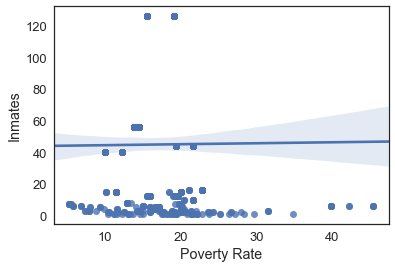

In [28]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties)

In [29]:
np.corrcoef(x=counties["Poverty Rate"], y=counties["Inmates"])

array([[ 1.        ,  0.00732972],
       [ 0.00732972,  1.        ]])

In [30]:
counties_3 = counties[counties.Inmates > 2]

In [31]:
np.corrcoef(x=counties_3["Poverty Rate"], y=counties_3["Inmates"])

array([[ 1.        ,  0.04892873],
       [ 0.04892873,  1.        ]])

In [32]:
counties_10 = counties[counties.Inmates > 9]
np.corrcoef(x=counties_10["Poverty Rate"], y=counties_10["Inmates"])


array([[ 1.        ,  0.15838181],
       [ 0.15838181,  1.        ]])

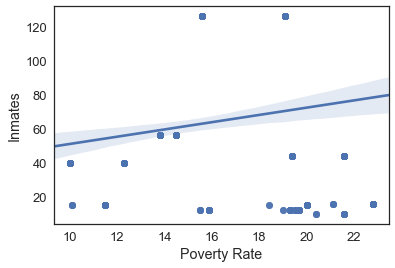

In [33]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_10)

In [34]:
x = counties_10['Poverty Rate']
y = counties_10['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [35]:
print (slope, intercept, r_value, p_value, std_err)

2.1365622722 29.6298051643 0.158381810314 0.00265375859605 0.70594143739


In [41]:
counties

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Bexar,19.4,44
Dallas,13.8,56
Tarrant,10.0,40
Houston,27.2,1
Hidalgo,45.4,6


In [64]:
import bokeh.sampledata
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as tx_counties
# from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

tx_counties = {
    code: county for code, county in tx_counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in tx_counties.values()]
county_ys = [county["lats"] for county in tx_counties.values()]

county_names = [county['name'] for county in tx_counties.values()]

for n in county_names:
    try:
        print(counties.ix[n]['Poverty Rate'])
        print("__")
    except:
        print("not found")
        print("---")

county_rates = [counties.ix[name]['Poverty Rate'] if name in counties else 0 for name in county_names]


not found
---
not found
---
not found
---
13.1
__
not found
---
not found
---
not found
---
County
Tarrant    12.3
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    12.3
Tarrant    10.0
Tarrant    10.0
Tarrant    10.0
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    10.0
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    12.3
Tarrant    10.0
Name: Poverty Rate, dtype: float64
__
County
Anderson    20.5
Anderson    20.1
Anderson    20.1
Anderson    20.1
Name: Poverty Rate, dtype: float64
__
not found
---
County
Polk    20.7
Polk    20.7
Name: Poverty Rate, dtype: float64
__
not found
---
not found
-

In [61]:
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Executed Inmates", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Poverty rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)